## 번외 Swipe 코인 가격 예측

21년 1월 1일 ~ 4월 14일 데이터를 통해 이 후 10일 간 금액 예측

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
swipe = pd.read_csv('/content/drive/MyDrive/Daycon/Swipe 과거 데이터 - Investing.csv')

In [ ]:
swipe.head()

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2021년 04월 14일,4.89,4.64,4.89,4.64,1.32M,6.10%
1,2021년 04월 13일,4.61,4.73,4.75,4.52,1.11M,-2.56%
2,2021년 04월 12일,4.73,5.02,5.02,4.69,1.13M,-5.66%
3,2021년 04월 11일,5.02,5.17,5.29,4.91,1.09M,-2.83%
4,2021년 04월 10일,5.17,4.77,5.35,4.75,1.96M,8.31%


In [ ]:
ts_df = pd.DataFrame()

ts_df['ds'] = swipe['날짜']
ts_df['y'] = swipe['종가']

In [ ]:
ts_df.head()

,ds,y
0,2021년 04월 14일,4.89
1,2021년 04월 13일,4.61
2,2021년 04월 12일,4.73
3,2021년 04월 11일,5.02
4,2021년 04월 10일,5.17


In [ ]:
def date_change(x):
    year = x[0:4]
    month  = x[6:8]
    day  = x[10:12]
    yes = year+'-'+month+'-'+day
    
    return yes

ts_df['ds'] = ts_df['ds'].apply(lambda x : datetime.datetime.strptime(date_change(x),"%Y-%m-%d"))

In [ ]:
ts_df = ts_df.set_index(ts_df['ds'])
ts_df.index.names = ['Date']

In [ ]:
ts_df.head()

,ds,y
Date,,
2021-04-14,2021-04-14,4.89
2021-04-13,2021-04-13,4.61
2021-04-12,2021-04-12,4.73
2021-04-11,2021-04-11,5.02
2021-04-10,2021-04-10,5.17


In [ ]:
len(ts_df)

104

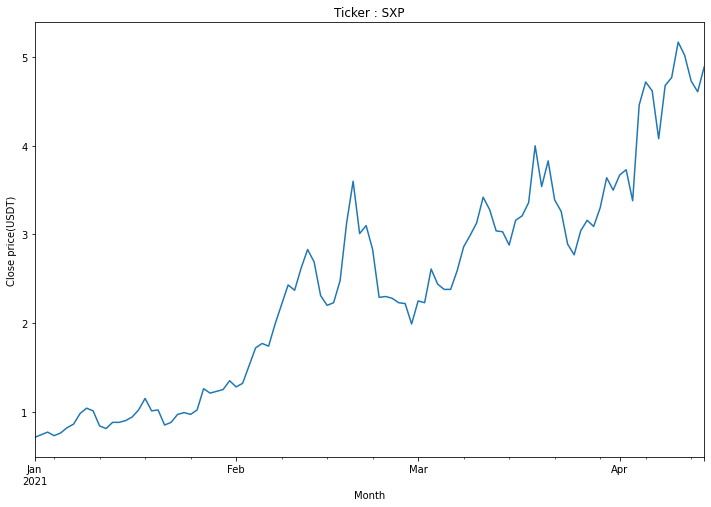

In [ ]:
ax = ts_df['y'].plot(title = 'Ticker : SXP',figsize = (12,8))
ax.set_ylabel('Close price(USDT)')
ax.set_xlabel('Month')
plt.show()

In [ ]:
ts_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 104 entries, 2021-04-14 to 2021-01-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      104 non-null    datetime64[ns]
 1   y       104 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.4 KB


In [ ]:
m = Prophet(daily_seasonality=True,
            changepoint_prior_scale = 0.15,
            seasonality_mode = 'additive') # overfitting을 피하기위해 train_data 80%만 사용
m.fit(ts_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods = 114, freq = 'D')
forecast = m.predict(future)
forecast = forecast[['ds','yhat','yhat_lower','yhat_upper']]

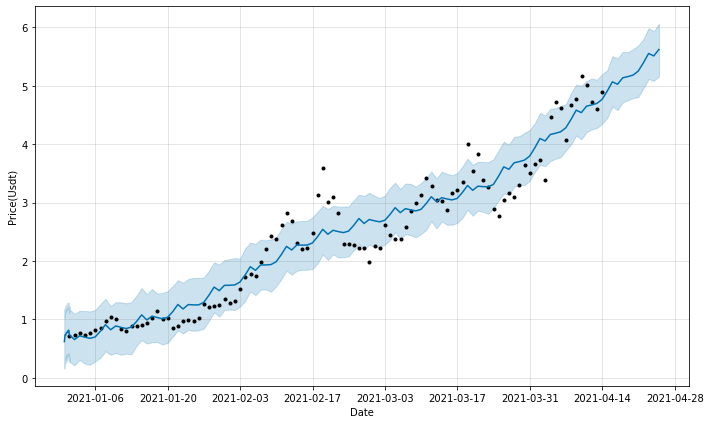

In [ ]:
fig1 = m.plot(forecast,xlabel = 'Date', ylabel = 'Price(Usdt)') 

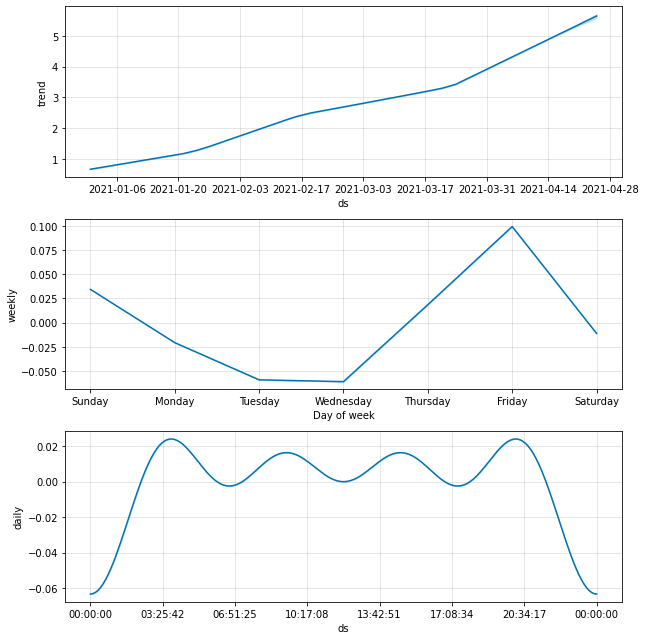

In [ ]:
# 계절성 파악
fig2 = m.plot_components(forecast)